# QOSF Mentorship Program - Task 1_variation1

Below I show the adaptation of the program so that it can accept values of size n=2 (same as before) with 5 bits in length (instead of 4). The values to consider are (the list should include 10 and 21 as elements):

[10,3,21,28]

The program can be easily adapted to accept random values of size  2𝑛  with m bits in length, for fixed values of n and m (with a bit more time).

It returns a quantum state which is a superposition of indices of the target solution, obtaining in the output the indices of the inputs where two adjacent bits will always have different values. In this case the output should be: 

1/sqrt(2) * (|00> + |10>) , as the correct indices are 0 and 2.


In [1]:
# Program Task 1_variation1
# Created by: Andres Diaz
# Date: 9/29/2021

# Load packages and standard Qiskit libraries
import numpy as np
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle

from qiskit.visualization import circuit_drawer

In [15]:
# Problem input and creation of dictionary
#     dictionary key   = input number in binary (four bits/qubits)
#     dictionary value = indices in binary (two bits/qubits)
input_list = [10,3,21,28]
input_dict = {}
for num in range(len(input_list)):
    element_bin = format(input_list[num], '#07b')
    integer_bin = format(num,'#04b')
    input_dict[element_bin[-5:]] = integer_bin[-2:]
print(input_dict)

{'01010': '00', '00011': '01', '10101': '10', '11100': '11'}


In [3]:
# These definitions are not necessary (or used), but will be useful in we desire to generalize the program
# to accept random values of size 2^n with m bits in length
n = 2   # n = number of addressing qbits
m = 4   # m = number of bits in length for each memory element

In [16]:
# Configure backend
shots = 1024;
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=shots)

# Condition of two adjacents bits having different value is achieved 
# by AND operation between XOR of adjacent bits in binary representation 
expression = '(v ^ w) & (w ^ x) & (x ^ y) & (y ^ z)'

# Create new oracle
oracle = PhaseOracle(expression)
problem = AmplificationProblem(oracle)
oracle.draw()

q_0: ─■──■─────■──■─
      │  │     │  │ 
q_1: ─■──┼──■──■──■─
      │  │  │  │  │ 
q_2: ─┼──■──o──o──o─
      │  │  │  │  │ 
q_3: ─o──o──■──■──┼─
      │  │  │     │ 
q_4: ─■──■──o─────■─

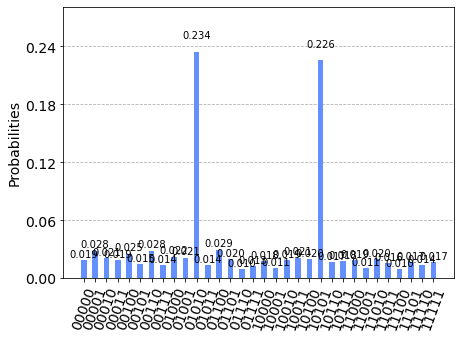

In [17]:
#Solve using Grover's algorithm
grover = Grover(quantum_instance=quantum_instance)
result = grover.amplify(problem)
plot_histogram(result.circuit_results)

In [18]:
print(result.circuit_results[0])

{'00100': 26, '10101': 231, '01100': 30, '00001': 29, '01001': 22, '01010': 240, '10011': 22, '10110': 17, '00110': 29, '11111': 17, '10000': 18, '10100': 20, '01000': 23, '00111': 14, '10010': 19, '11110': 14, '10111': 18, '11010': 20, '01111': 13, '11000': 19, '01011': 14, '11001': 11, '11011': 16, '11101': 17, '00010': 21, '01101': 20, '00101': 15, '00000': 19, '10001': 11, '00011': 19, '01110': 10, '11100': 10}


In [19]:
# Determine probabilities corresponding to input elements
# and assign to output dictionary with keys = indices in binary
output_dict = {}
for input_key in input_dict.keys():
    print(input_key,input_dict[input_key],result.circuit_results[0][input_key]/shots)
    output_dict[input_dict[input_key]] = result.circuit_results[0][input_key]/shots

01010 00 0.234375
00011 01 0.0185546875
10101 10 0.2255859375
11100 11 0.009765625


In [20]:
print(output_dict)

{'00': 0.234375, '01': 0.0185546875, '10': 0.2255859375, '11': 0.009765625}


In [21]:
# It is given that the input contains at least two numbers with alternating bitstrings
# Hence, we look for the two highest probabilities. Only states are stored in output_list
max1 = max(output_dict, key = output_dict.get)
del output_dict[max1]
max2 = max(output_dict, key = output_dict.get)
output_list = [max1,max2]
print(output_list)

['00', '10']


In [22]:
# The output will be a quantum circuit which is the superposition of these two states
# Prepare list of complex amplitudes of [00,01,10,11] states
states = ['00','01','10','11']
amplitudes = [0,0,0,0]
for num in range(len(states)):
    if states[num] in output_list:
        amplitudes[num] = 1/np.sqrt(2)
    else:
        amplitudes[num] = 0    
    print(states[num], amplitudes[num])
    
# Declare and initialize output quantum circuit qc_out with the desired superposition of states
qc_out = QuantumCircuit(2)
qc_out.initialize(amplitudes, [0,1])
qc_out.draw()

00 0.7071067811865475
01 0
10 0.7071067811865475
11 0


┌──────────────────────────────────┐
q_0: ┤0                                 ├
     │  Initialize(0.70711,0,0.70711,0) │
q_1: ┤1                                 ├
     └──────────────────────────────────┘